In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from nltk.corpus import stopwords

warnings.filterwarnings("ignore")

Custom functions

In [275]:
#1 Remove stop words from text
def remove_stops(text, filler=''):
    return filler.join([word.title() for word in text.lower().split() if word not in stopwords.words('english')])

#2 Plot function for value counts
def value_count_plot(df, columns, size=[10, 10]):
    ncols = 3
    idx = 1

    if len(columns) % ncols != 0:
        nrows = len(columns) // ncols + 1
    else:
        nrows = len(columns) // ncols

    plt.figure(figsize=size, layout='tight')
    for col in columns:
        if idx == 3:
            ax.set_title('Value counts for object types')
        ax = plt.subplot(nrows, ncols, idx)
        df[col].value_counts(normalize= True).plot.barh(ax)
        idx += 1
    plt.show()

#3 Store null columns in a dataframe
def fetch_nulls(df):
    nulls = df.isnull().sum()
    condition = df.isnull().sum() > 0

    df_nulls = pd.concat([df[nulls[condition].index].dtypes, (nulls[condition] / len(df) * 100).round(2)], axis=1).reset_index()
    df_nulls.columns = ['Column_name', 'dtype', 'percent_nulls']
    df_nulls.sort_values(by= 'percent_nulls', ascending= False)
    return df_nulls

## Load Data

In [276]:
ls = pd.read_csv("Leads.csv")
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [277]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [278]:
ls.columns = [remove_stops(text, '_') for text in ls.columns]

In [279]:
# Segregating columns as per dtypes
cat_cols = ls.columns[ls.dtypes == 'O']
num_cols = ls.columns[ls.dtypes != 'O']

Dataset has 9240 records

Prospect ID is an object type unique key for all records, but so is Lead Number which is an integer type. Hence Prospect ID is dropped and Lead Number can be used as unique key of each record

In [280]:
ls.drop(columns=['Prospect_Id'], inplace= True)
cat_cols = cat_cols.drop('Prospect_Id')

Shortening column names by removing stopwords and other chosen words

Percent null values

In [281]:
nulls = fetch_nulls(ls)
nulls

,Column_name,dtype,percent_nulls
0,Lead_Source,object,0.39
1,Totalvisits,float64,1.48
2,Page_Views_Per_Visit,float64,1.48
3,Last_Activity,object,1.11
4,Country,object,26.63
5,Specialization,object,15.56
6,Hear_X_Education,object,23.89
7,Current_Occupation,object,29.11
8,Matters_Choosing_Course,object,29.32
9,Tags,object,36.29


## Missing value treatment

Plotting value counts for object type columns with null values

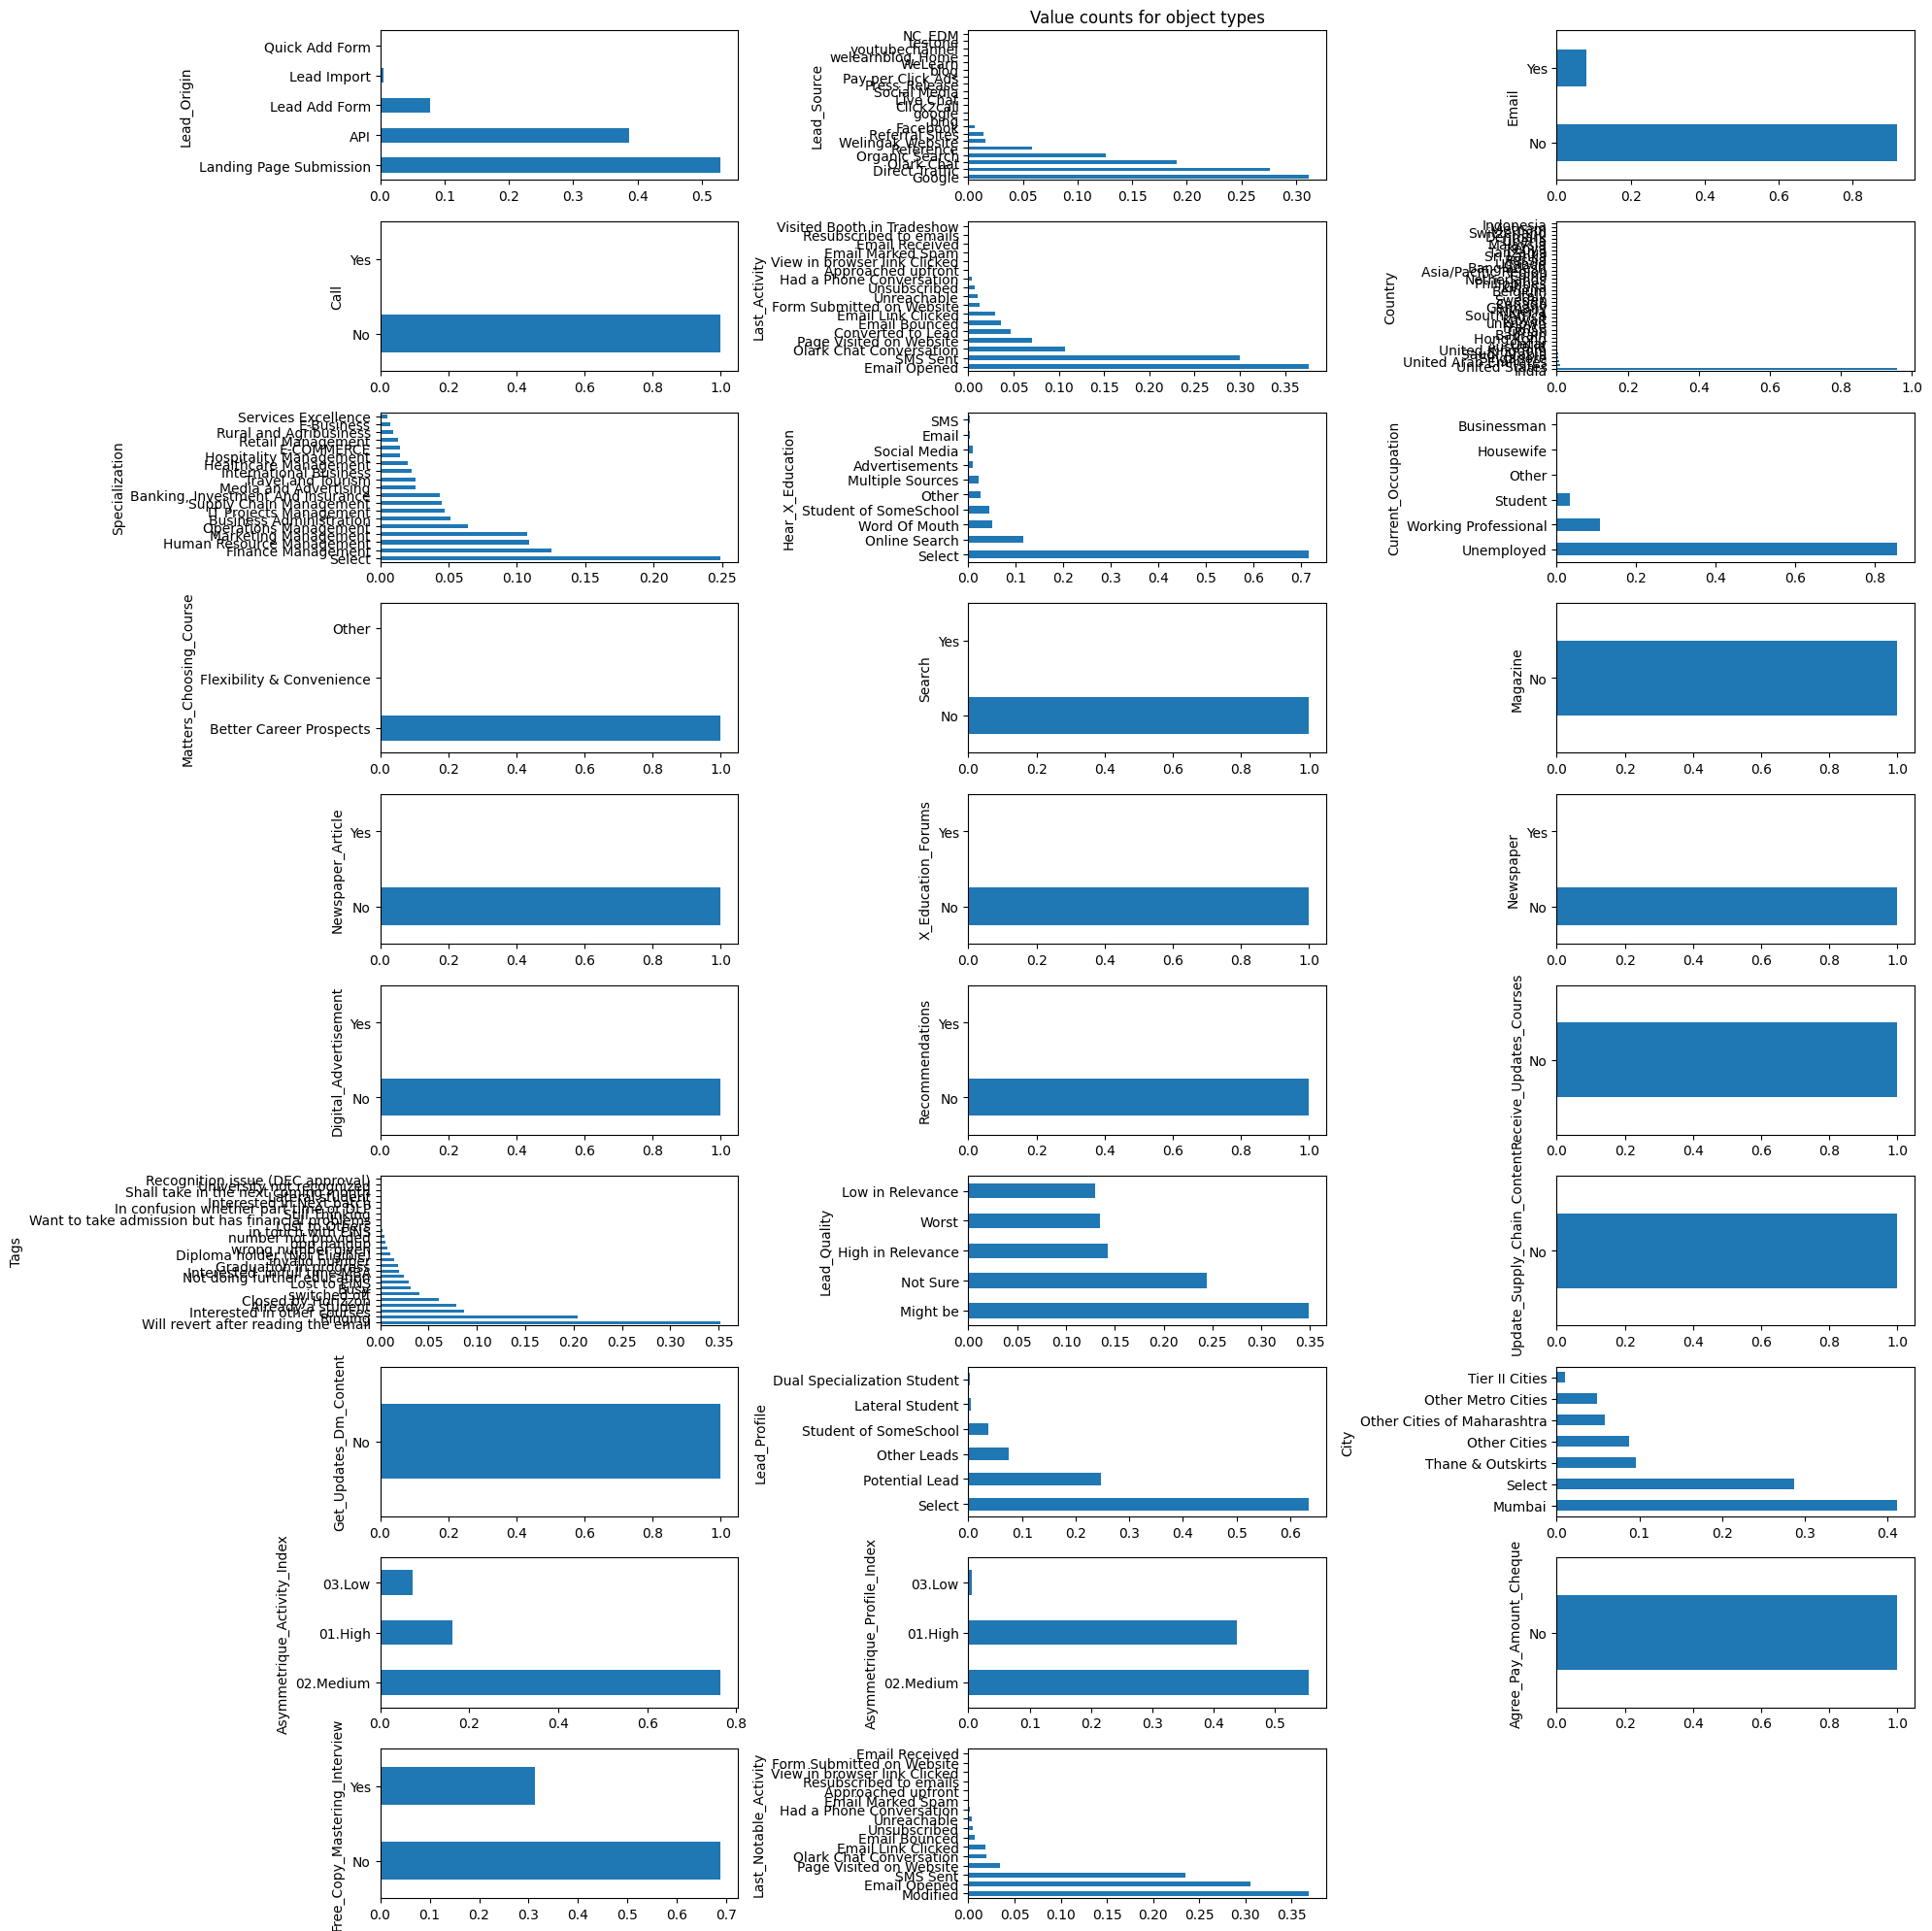

In [282]:
value_count_plot(ls, cat_cols, size=(20, 20))

Columns that can be dropped
1. Matters_Choosing_Course: skewed distribution with 29% missing values
2. Country: skewedd distribution with 26% missing values

In [283]:
ls.drop(columns=['Matters_Choosing_Course', 'Country'], inplace=True)
cat_cols = cat_cols.drop(['Matters_Choosing_Course', 'Country'])

Index(['Lead_Origin', 'Lead_Source', 'Email', 'Call', 'Last_Activity',
       'Specialization', 'Hear_X_Education', 'Current_Occupation', 'Search',
       'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Recommendations', 'Receive_Updates_Courses',
       'Tags', 'Lead_Quality', 'Update_Supply_Chain_Content',
       'Get_Updates_Dm_Content', 'Lead_Profile', 'City',
       'Asymmetrique_Activity_Index', 'Asymmetrique_Profile_Index',
       'Agree_Pay_Amount_Cheque', 'Free_Copy_Mastering_Interview',
       'Last_Notable_Activity'],
      dtype='object')

Lead_Quality

In [284]:
for col in ls[cat_cols].columns:
    print(ls[ls['Lead_Quality'].isna()][col].value_counts(normalize= True))

Lead_Origin
API                        0.503461
Landing Page Submission    0.451227
Lead Add Form              0.038808
Lead Import                0.006293
Quick Add Form             0.000210
Name: proportion, dtype: float64
Lead_Source
Google               0.305912
Olark Chat           0.275195
Direct Traffic       0.244056
Organic Search       0.112771
Welingak Website     0.025878
Referral Sites       0.016411
Reference            0.009678
Facebook             0.006312
bing                 0.001262
google               0.001052
blog                 0.000210
Pay per Click Ads    0.000210
Click2call           0.000210
welearnblog_Home     0.000210
youtubechannel       0.000210
Press_Release        0.000210
NC_EDM               0.000210
Name: proportion, dtype: float64
Email
No     0.911684
Yes    0.088316
Name: proportion, dtype: float64
Call
No    1.0
Name: proportion, dtype: float64
Last_Activity
Email Opened                    0.400675
SMS Sent                        0.216154
Olark

In [285]:
ls[ls['Lead_Quality'].isnull()].Converted.describe()

count    4767.000000
mean        0.214810
std         0.410734
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Converted, dtype: float64

From business perspective Lead_Quality is an important feature that may indicate Hot_Leads. So entire column cannot be dropped. But imputing missing values may adversely bias analysis. Hence the missing rows are dropped.

In [286]:
ls = ls[~ls['Lead_Quality'].isna()]
fetch_nulls(ls)

,Column_name,dtype,percent_nulls
0,Lead_Source,object,0.49
1,Totalvisits,float64,2.21
2,Page_Views_Per_Visit,float64,2.21
3,Last_Activity,object,1.74
4,Tags,object,0.60
5,Asymmetrique_Activity_Index,object,45.25
6,Asymmetrique_Profile_Index,object,45.25
7,Asymmetrique_Activity_Score,float64,45.25
8,Asymmetrique_Profile_Score,float64,45.25


In [297]:
asm_cols = [col for col in ls.columns if 'asymmetrique' in col.lower().split('_')]
asm_idx = np.array([ls[ls[col].isnull()].index for col in asm_cols])

In [305]:
# Missing values of Asymmetrique columns have the same indices
for i in asm_idx[1:]:
    print(np.all(asm_idx[0] == i))

True
True
True
